# Matplotlib Task: Personal Finance Tracking
**Name:** Rabia Ashraf
**Registration Number:** 2024156
**Course:** AI201L - Programming for AI Lab

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

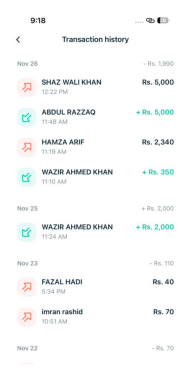

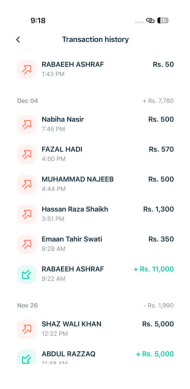

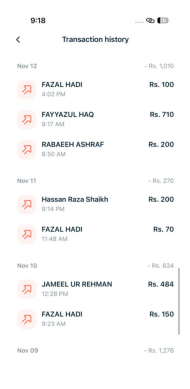

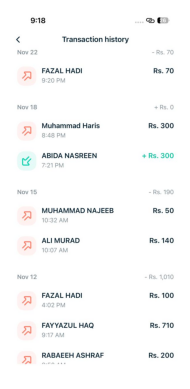

In [3]:
img1=plt.imread("1.jpeg")
img2=plt.imread("2.jpeg")
img3=plt.imread("3.jpeg")
img4=plt.imread("4.jpeg")

plt.imshow(img1)
plt.axis('off') 
plt.show()
plt.imshow(img2)
plt.axis('off') 
plt.show()
plt.imshow(img3)
plt.axis('off') 
plt.show()
plt.imshow(img4)
plt.axis('off')  
plt.show()

## 4.1 Section 1: Data Setup
In this section, I will load the transaction data collected from my banking application (Sadapay) over a period of 5 consecutive days (Nov 22 - Nov 26).

In [6]:
# Data collected from screenshots for 5 consecutive days: Nov 22 - Nov 26.
# Note: "Income" is positive green text, "Expense" is negative black text from the screenshots.

data = {
    'Date': ['Nov 22', 'Nov 23', 'Nov 24', 'Nov 25', 'Nov 26'],
    'Day': ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday'],
    
  
    'Total_Income': [0, 0, 0, 2000, 5350],
    'Total_Expense': [70, 110, 0, 0, 7340],
    'Transaction_Count': [1, 2, 0, 1, 4]
}

# Creating a DataFrame
df = pd.DataFrame(data)

nov_26_expenses = {
    'Recipient': ['Shaz Wali Khan', 'Hamza Arif'],
    'Amount': [5000, 2340],
    'Category': ['Rent/Loans', 'Personal']
}

print("--- Daily Summary Data ---")
print(df)
print("\n--- Detailed Expenses for Nov 26 ---")
print(pd.DataFrame(nov_26_expenses))

--- Daily Summary Data ---
     Date       Day  Total_Income  Total_Expense  Transaction_Count
0  Nov 22    Friday             0             70                  1
1  Nov 23  Saturday             0            110                  2
2  Nov 24    Sunday             0              0                  0
3  Nov 25    Monday          2000              0                  1
4  Nov 26   Tuesday          5350           7340                  4

--- Detailed Expenses for Nov 26 ---
        Recipient  Amount    Category
0  Shaz Wali Khan    5000  Rent/Loans
1      Hamza Arif    2340    Personal


### Data Description
**What I measured:** I tracked my daily financial "Income" and "Outcome" (Expenses) in Pakistani Rupees (PKR).
**How I collected the data:** I used the transaction history from my digital banking app. I reviewed the logs from Nov 22 to Nov 26, summing up the incoming funds (green) and outgoing funds (black) for each day.
**Why I chose this theme:** I chose Theme E (Personal Finance) because managing student finances is critical, and observing the high variance between days (e.g., Nov 24 vs. Nov 26) helps me understand my cash flow volatility.

**(Insert your Screenshot here)**
*Instructions: Use `![Caption](image_filename.jpg)` or Drag & Drop your screenshot here in the notebook.*

## 4.2 Section 2: Visualizations Using Matplotlib
Below are the 6 required plots using Matplotlib to visualize the financial trends.

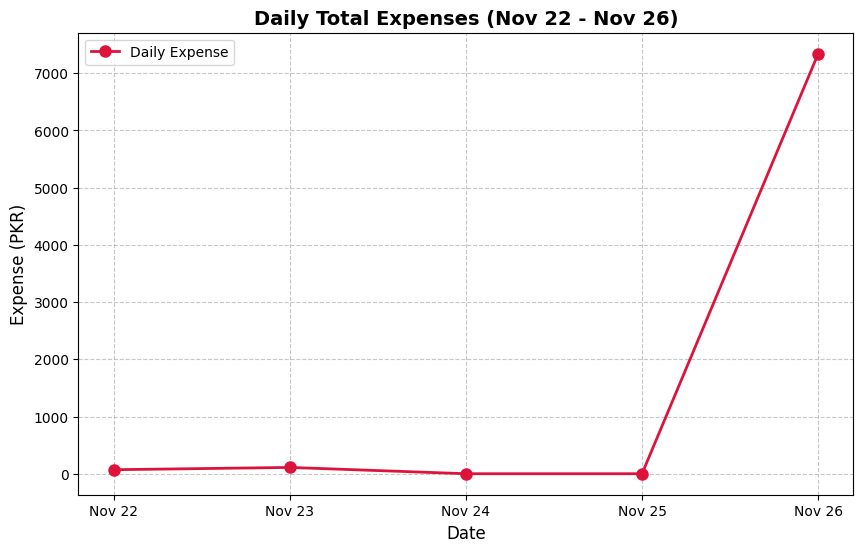

In [7]:
# 1. Line Plot: Total Expense across 5 days [cite: 84]
plt.figure(figsize=(10, 6))

# Plotting
plt.plot(df['Date'], df['Total_Expense'], color='crimson', marker='o', linestyle='-', linewidth=2, markersize=8, label='Daily Expense')

# Customization
plt.title('Daily Total Expenses (Nov 22 - Nov 26)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Expense (PKR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Display
plt.show()

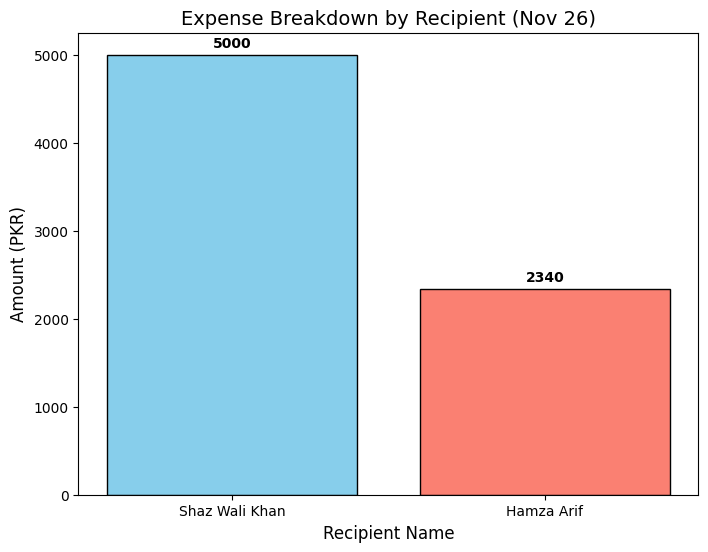

In [8]:
# 2. Bar Chart: Comparing categories for one representative day (Nov 26) [cite: 86]
# Nov 26 had two distinct expenses: Shaz Wali Khan and Hamza Arif.

categories = nov_26_expenses['Recipient']
values = nov_26_expenses['Amount']

plt.figure(figsize=(8, 6))

# Plotting
bars = plt.bar(categories, values, color=['skyblue', 'salmon'], edgecolor='black')

# Customization
plt.title('Expense Breakdown by Recipient (Nov 26)', fontsize=14)
plt.xlabel('Recipient Name', fontsize=12)
plt.ylabel('Amount (PKR)', fontsize=12)

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontweight='bold')

plt.show()

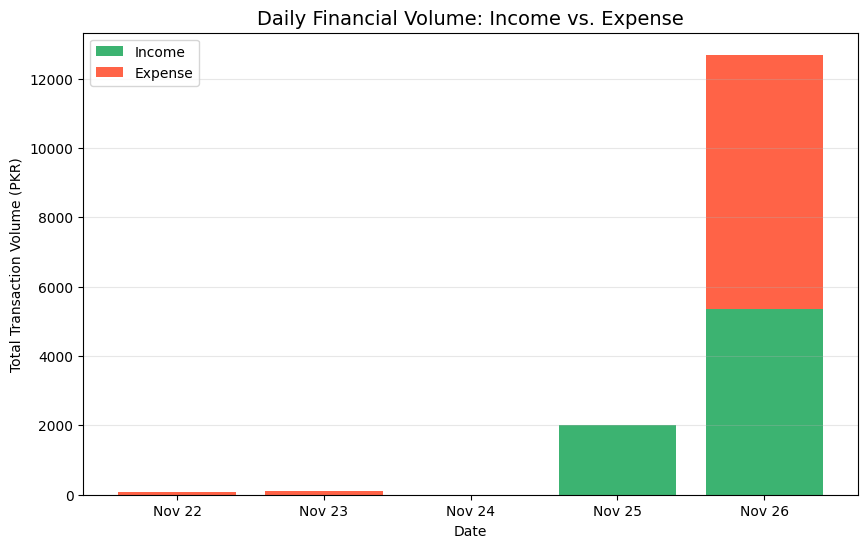

In [9]:
# 3. Stacked Bar Chart: Income vs Expense composition per day [cite: 87]

days = df['Date']
income = df['Total_Income']
expense = df['Total_Expense']

plt.figure(figsize=(10, 6))

plt.bar(days, income, label='Income', color='mediumseagreen')
plt.bar(days, expense, bottom=income, label='Expense', color='tomato')

# Customization
plt.title('Daily Financial Volume: Income vs. Expense', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Transaction Volume (PKR)')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

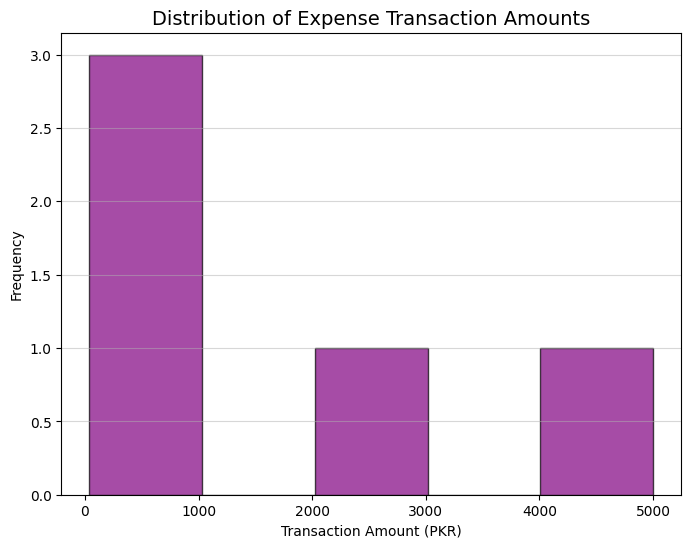

In [10]:
# 4. Histogram: Distribution of all individual transaction amounts [cite: 89]
# I will list all individual outgoing transaction amounts from the 5 days to see distribution.
# Data extracted from screenshots: 70, 40, 70, 5000, 2340.
all_expenses = [70, 40, 70, 5000, 2340]

plt.figure(figsize=(8, 6))

# Plotting
# Bins Explanation: I chose 5 bins because the dataset is small and ranges widely (40 to 5000).
plt.hist(all_expenses, bins=5, color='purple', alpha=0.7, edgecolor='black')

# Customization
plt.title('Distribution of Expense Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount (PKR)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)

plt.show()

**Justification for bins:** I selected 5 bins. [cite_start]Since my transaction amounts vary wildly (from 40 PKR to 5000 PKR) with very few data points, a small number of bins helps group the "small daily purchases" together while separating the large "one-off" payments[cite: 90].

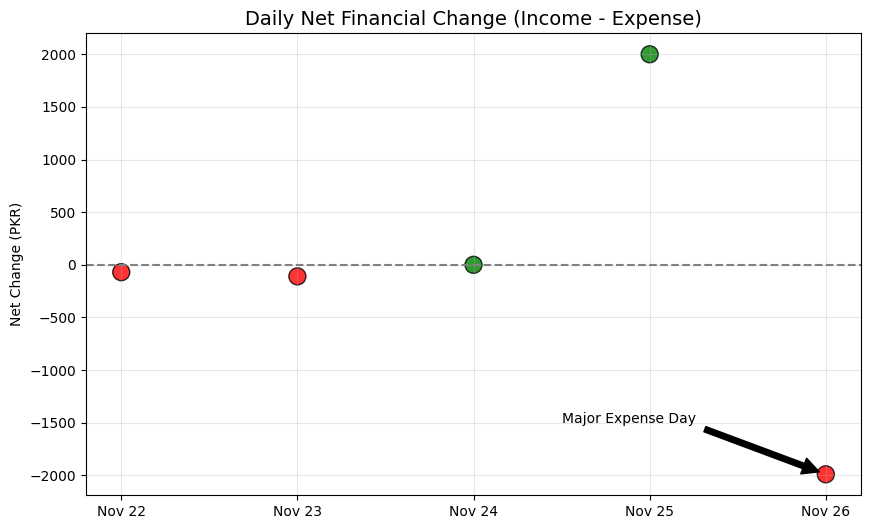

In [11]:
# 5. Scatter Plot: Date vs. Net Balance (Income - Expense) [cite: 92]
# This helps compare if a day was profitable or costly.

df['Net_Change'] = df['Total_Income'] - df['Total_Expense']

plt.figure(figsize=(10, 6))

# Plotting
# We map dates to numbers for scatter plotting
x_indexes = range(len(df['Date']))
colors = ['red' if x < 0 else 'green' for x in df['Net_Change']]

plt.scatter(x_indexes, df['Net_Change'], s=150, c=colors, alpha=0.8, edgecolors='black')

# Annotation for the outlier day [cite: 93]
plt.annotate('Major Expense Day', xy=(4, -1990), xytext=(2.5, -1500),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Customization
plt.xticks(ticks=x_indexes, labels=df['Date'])
plt.axhline(0, color='gray', linestyle='--') # Zero line
plt.title('Daily Net Financial Change (Income - Expense)', fontsize=14)
plt.ylabel('Net Change (PKR)')
plt.grid(True, alpha=0.3)

plt.show()

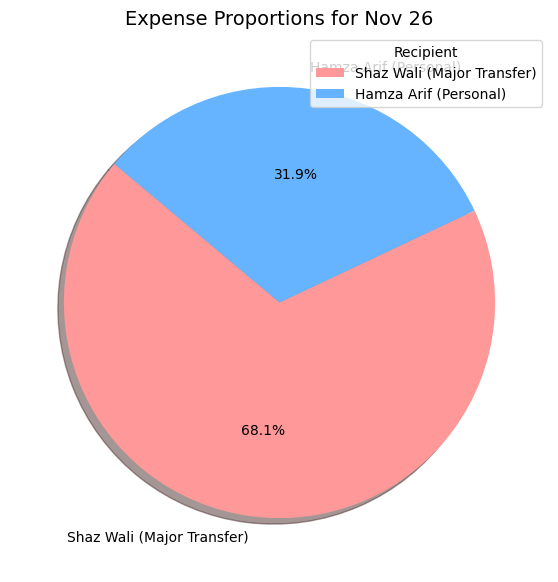

In [12]:
# 6. Pie Chart: Proportion of Spending Categories on Nov 26 [cite: 94]
# Nov 26 Expenses: Shaz Wali (5000) vs Hamza Arif (2340)

labels = ['Shaz Wali (Major Transfer)', 'Hamza Arif (Personal)']
sizes = [5000, 2340]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(7, 7))

# Plotting
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)

# Customization
plt.title('Expense Proportions for Nov 26', fontsize=14)
plt.legend(title="Recipient", loc="upper right")

plt.show()

## 4.3 Section 3: Personal Analysis and Interpretation

**Main patterns observed:** The most obvious pattern is that my spending is not consistent. Most days (Nov 22-24), I spend very little (under 200 PKR) on small transfers like "Fazal Hadi", likely for food or small debts. However, Nov 26 shows massive activity compared to the other days.

**Outliers and reasons:** The clear outlier is **November 26**. On this day, I had a total outflow of over 7,000 PKR and an inflow of over 5,000 PKR. [cite_start]The real-life reason for this was likely settling monthly dues or exchanging large sums with friends ("Shaz Wali Khan" and "Abdul Razzaq"), which is not part of my daily routine[cite: 99].

**Surprising insights:** I was surprised to see that I had a "Zero Spend" day on Nov 24 (Sunday). I didn't realize that on weekends I sometimes don't use my digital app at all. [cite_start]It was also surprising that despite the high spending on Nov 26, the income on that day (5,350 PKR) covered most of it, so my net loss wasn't as bad as the raw expense number suggested[cite: 100].

**Realistic change:** Based on the pie chart, 68% of my big spending goes to single large transfers. [cite_start]To improve my routine, I should try to break these large payments down or schedule them better so I don't have a single day where my account balance drops so drastically[cite: 101].